In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
import statsmodels.formula.api as smf

wd = '../../Desktop/DAT_03_20_Shaan_Penmetsa/'
charge_data = pd.read_csv(wd+'Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv')
hospital_attributes = pd.read_csv(wd+'DefHCData.csv')

In [2]:
charge_data = charge_data.drop('Provider Street Address',axis=1)

In [3]:
charge_data.dtypes

DRG Definition                                 object
Provider Id                                     int64
Provider Name                                  object
Provider City                                  object
Provider State                                 object
Provider Zip Code                               int64
Hospital Referral Region (HRR) Description     object
Total Discharges                                int64
Average Covered Charges                       float64
Average Total Payments                        float64
Average Medicare Payments                     float64
dtype: object

In [4]:
charge_data.head()

,DRG Definition,Provider Id,Provider Name,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,BIRMINGHAM,AL,35233,AL - Birmingham,13,1172866.385,251876.3077,244457.9231
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,PHOENIX,AZ,85054,AZ - Phoenix,20,437531.300,240422.8000,133509.5500
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SUTTER GENERAL HOSPITAL,SACRAMENTO,CA,95816,CA - Sacramento,25,815674.120,233197.4800,221681.8000
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,LOS ANGELES,CA,90095,CA - Los Angeles,14,1499043.571,415968.7857,366608.9286
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HOSPITAL,STANFORD,CA,94305,CA - San Mateo County,23,2238699.130,420865.4783,403453.6522


In [5]:
hospital_attributes = hospital_attributes.drop(['Definitive ID', 'IDN', 'Adjusted Patient Days'], axis=1)

In [6]:
hospital_attributes = hospital_attributes.dropna(subset=['Provider Number'])

In [7]:
hospital_attributes.head()

,Provider Number,Hospital Name,Hospital Type,Firm Type,Ownership,Sole Community Hospital,Academic Medical Center,Market Concentration Index,ACO Affiliations,Total Patient Revenue,...,2014 Discharges,# of Staffed Beds,# of Hospitals,# of Payors,Hospital Compare Overall Rating,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,HAC FY2015 Percentile,Education Designation
3,49005F,633rd Medical Group - USAF Hospital Langley,Department of Defense Hospital,Hospital,Governmental - Federal,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5,421301,Abbeville Area Medical Center,Critical Access Hospital,Hospital,Governmental - County,NaN,NaN,0.80,MyHealth First Network,"$74,603,405",...,563.0,25.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
6,190034,Abbeville General Hospital,Short Term Acute Care Hospital,Hospital,Governmental - Hospital District,NaN,NaN,0.21,NaN,"$111,331,159",...,1251.0,44.0,NaN,NaN,3.0,7.0,0.5%,-1.96%,67.11,No
7,240057,Abbott Northwestern Hospital,Short Term Acute Care Hospital,Hospital,Voluntary Nonprofit - Other,NaN,NaN,0.07,Allina Integrated Medical Network,"$2,757,487,593",...,36198.0,579.0,NaN,NaN,4.0,73.0,0.19%,0%,48.75,No
8,450558,Abilene Regional Medical Center,Short Term Acute Care Hospital,Hospital,Proprietary - Corporation,NaN,NaN,0.54,NaN,"$914,759,033",...,5852.0,180.0,NaN,NaN,3.0,13.0,-0.14%,-0.26%,54.99,NaN


In [8]:
hospital_attributes['Provider Number'] = hospital_attributes['Provider Number'].convert_objects(convert_numeric=True)
hospital_attributes['Total Patient Revenue'] = (hospital_attributes['Total Patient Revenue'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
hospital_attributes['Net Patient Revenue'] = (hospital_attributes['Net Patient Revenue'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
hospital_attributes['Total Uncompensated Care Unrimbursed Costs'] = (hospital_attributes['Total Uncompensated Care Unrimbursed Costs'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [9]:
hospital_attributes = hospital_attributes.dropna(subset=['Provider Number'])

In [10]:
hospital_attributes['Provider Number'] = hospital_attributes['Provider Number'].astype(int)

In [11]:
hospital_attributes.dtypes

Provider Number                                        int64
Hospital Name                                         object
Hospital Type                                         object
Firm Type                                             object
Ownership                                             object
Sole Community Hospital                               object
Academic Medical Center                               object
Market Concentration Index                           float64
ACO Affiliations                                      object
Total Patient Revenue                                float64
Net Patient Revenue                                  float64
Gross Medicare Revenue                                object
Net Medicare Revenue                                  object
Payor Mix: Medicare                                   object
Payor Mix: Medicaid                                   object
Payor Mix: Private/Self-Pay/Other                     object
Total Uncompensated Care

In [12]:
data = pd.merge(charge_data, hospital_attributes, how='left', left_on='Provider Id', right_on='Provider Number')

In [13]:
data = data.sort(columns='Provider Id')
data.head()

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,DRG Definition,Provider Id,Provider Name,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,...,2014 Discharges,# of Staffed Beds,# of Hospitals,# of Payors,Hospital Compare Overall Rating,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,HAC FY2015 Percentile,Education Designation
172030,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,87,24335.63218,4863.747126,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
118504,393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,23,42650.21739,9413.304348,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
41854,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,82,26723.29268,5818.768293,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
57826,242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,11,84830.27273,19307.181820,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
20080,149 - DYSEQUILIBRIUM,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,20,22990.80000,4351.350000,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No


In [14]:
data.dtypes

DRG Definition                                        object
Provider Id                                            int64
Provider Name                                         object
Provider City                                         object
Provider State                                        object
Provider Zip Code                                      int64
Hospital Referral Region (HRR) Description            object
Total Discharges                                       int64
Average Covered Charges                              float64
Average Total Payments                               float64
Average Medicare Payments                            float64
Provider Number                                      float64
Hospital Name                                         object
Hospital Type                                         object
Firm Type                                             object
Ownership                                             object
Sole Community Hospital 

In [15]:
data = data.drop(['Provider Number', 'Hospital Name', 'Medicare Spending per Patient Percentile', 'Gross Medicare Revenue', 'Net Medicare Revenue', 'HAC FY2015 Percentile', 'Hospital Compare Overall Rating', '# of Staffed Beds', 'Provider City', 'Provider Zip Code', 'Firm Type', 'Hospital Type', '# of Hospitals', '# of Payors'], axis=1)

In [16]:
data['Medicare FY2014 Value-Based Purchasing Adjustment'] = data['Medicare FY2014 Value-Based Purchasing Adjustment'].replace('%','',regex=True).astype('float')/100
data['Medicare FY2014 Readmission Rate Penalty'] = data['Medicare FY2014 Readmission Rate Penalty'].replace('%','',regex=True).astype('float')/100
data['Payor Mix: Medicare'] = data['Payor Mix: Medicare'].replace('%','',regex=True).astype('float')/100
data['Payor Mix: Medicaid'] = data['Payor Mix: Medicaid'].replace('%','',regex=True).astype('float')/100
data['Payor Mix: Private/Self-Pay/Other'] = data['Payor Mix: Private/Self-Pay/Other'].replace('%','',regex=True).astype('float')/100

In [17]:
data['% COGS'] = (data['Total Patient Revenue'] - data['Net Patient Revenue']) / data['Total Patient Revenue']

In [18]:
data.dtypes

DRG Definition                                        object
Provider Id                                            int64
Provider Name                                         object
Provider State                                        object
Hospital Referral Region (HRR) Description            object
Total Discharges                                       int64
Average Covered Charges                              float64
Average Total Payments                               float64
Average Medicare Payments                            float64
Ownership                                             object
Sole Community Hospital                               object
Academic Medical Center                               object
Market Concentration Index                           float64
ACO Affiliations                                      object
Total Patient Revenue                                float64
Net Patient Revenue                                  float64
Payor Mix: Medicare     

In [19]:
data.head()

,DRG Definition,Provider Id,Provider Name,Provider State,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Ownership,...,Net Patient Revenue,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,Education Designation,% COGS
172030,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,87,24335.63218,4863.747126,3675.517241,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248
118504,393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,23,42650.21739,9413.304348,8656.086957,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248
41854,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,82,26723.29268,5818.768293,4753.621951,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248
57826,242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,11,84830.27273,19307.181820,16432.090910,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248
20080,149 - DYSEQUILIBRIUM,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,20,22990.80000,4351.350000,2692.700000,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248


In [20]:
data.shape

(202656, 25)

In [21]:
data.isnull().sum()

DRG Definition                                            0
Provider Id                                               0
Provider Name                                             0
Provider State                                            0
Hospital Referral Region (HRR) Description                0
Total Discharges                                          0
Average Covered Charges                                   0
Average Total Payments                                    0
Average Medicare Payments                                 0
Ownership                                              1788
Sole Community Hospital                              186023
Academic Medical Center                              166598
Market Concentration Index                             5921
ACO Affiliations                                      84927
Total Patient Revenue                                  2273
Net Patient Revenue                                    2273
Payor Mix: Medicare                     

In [22]:
data[pd.isnull(data['Ownership'])]

,DRG Definition,Provider Id,Provider Name,Provider State,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Ownership,...,Net Patient Revenue,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,Education Designation,% COGS
115772,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,12,6498.416667,4672.083333,3584.083333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190895,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,11,8489.272727,6138.818182,5277.727273,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79891,293 - HEART FAILURE & SHOCK W/O CC/MCC,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,11,7066.272727,4312.909091,3341.272727,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188058,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,17,10945.470590,10214.823530,9444.941176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74471,291 - HEART FAILURE & SHOCK W MCC,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,13,8862.769231,8770.230769,7190.692308,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77118,292 - HEART FAILURE & SHOCK W CC,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,20,10811.700000,5898.950000,4950.150000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41977,194 - SIMPLE PNEUMONIA & PLEURISY W CC,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,33,18385.636360,6813.393939,5488.151515,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77221,292 - HEART FAILURE & SHOCK W CC,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,21,17860.714290,6770.904762,6080.619048,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188154,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,31,32921.612900,11793.677420,10976.161290,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166831,683 - RENAL FAILURE W CC,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,16,16219.875000,6908.187500,6061.187500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data = data.dropna(subset=['Ownership'])

In [24]:
data[['Sole Community Hospital', 'Academic Medical Center', 'ACO Affiliations']] = data[['Sole Community Hospital', 'Academic Medical Center', 'ACO Affiliations']].fillna('no')

In [25]:
data.loc[data['ACO Affiliations'] != 'no','ACO Affiliations'] = 'yes'

In [26]:
data.isnull().sum()

DRG Definition                                           0
Provider Id                                              0
Provider Name                                            0
Provider State                                           0
Hospital Referral Region (HRR) Description               0
Total Discharges                                         0
Average Covered Charges                                  0
Average Total Payments                                   0
Average Medicare Payments                                0
Ownership                                                0
Sole Community Hospital                                  0
Academic Medical Center                                  0
Market Concentration Index                            4133
ACO Affiliations                                         0
Total Patient Revenue                                  485
Net Patient Revenue                                    485
Payor Mix: Medicare                                     

In [27]:
data.describe()

,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Market Concentration Index,Total Patient Revenue,Net Patient Revenue,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,% COGS
count,200868.000000,200868.000000,2.008680e+05,200868.000000,200868.000000,196735.000000,2.003830e+05,2.003830e+05,200861.000000,198328.000000,200861.000000,2.002870e+05,199516.000000,191393.000000,200405.000000,200383.000000
mean,255052.552622,36.102485,5.276972e+04,13200.966856,11246.261913,0.294657,1.839781e+09,5.078040e+08,0.370237,0.102549,0.528518,2.723559e+07,17729.554973,-0.000078,-0.002615,0.700293
std,150837.059483,49.005544,6.261866e+04,13810.077010,12312.431021,0.294986,1.954093e+09,5.476425e+08,0.106289,0.080672,0.117713,4.117655e+07,14351.386566,0.002795,0.003301,0.129466
min,10001.000000,11.000000,1.367652e+03,2320.482759,1329.909091,0.020000,2.098553e+06,1.681453e+06,0.005000,0.000000,0.002000,-1.779940e+05,30.000000,-0.011400,-0.020000,0.000000
25%,110078.000000,15.000000,2.101657e+04,6266.434816,5018.318181,0.060000,6.382458e+08,1.784349e+08,0.291000,0.044000,0.452000,7.923540e+06,8079.000000,-0.001900,-0.003900,0.643064
50%,240080.000000,22.000000,3.477002e+04,9202.830663,7734.047589,0.190000,1.262162e+09,3.306231e+08,0.369000,0.078000,0.533000,1.575736e+07,14335.000000,-0.000100,-0.001300,0.717444
75%,380014.000000,39.000000,6.096919e+04,14669.937502,12506.074455,0.440000,2.379596e+09,6.175482e+08,0.445000,0.139000,0.616000,3.010341e+07,24013.000000,0.001900,0.000000,0.783669
max,670088.000000,3855.000000,2.238699e+06,434396.000000,403453.652200,1.000000,1.437597e+10,4.518955e+09,0.950000,0.841000,0.991000,6.298375e+08,133218.000000,0.008800,0.000000,0.957007


                                                   Provider Id  \
Provider Id                                           1.000000   
Total Discharges                                     -0.001497   
Average Covered Charges                              -0.071361   
Average Total Payments                               -0.017956   
Average Medicare Payments                            -0.032000   
Market Concentration Index                            0.060333   
Total Patient Revenue                                -0.023438   
Net Patient Revenue                                   0.016890   
Payor Mix: Medicare                                  -0.040277   
Payor Mix: Medicaid                                  -0.186041   
Payor Mix: Private/Self-Pay/Other                     0.163842   
Total Uncompensated Care Unrimbursed Costs           -0.052972   
2014 Discharges                                       0.007532   
Medicare FY2014 Value-Based Purchasing Adjustment     0.020986   
Medicare F

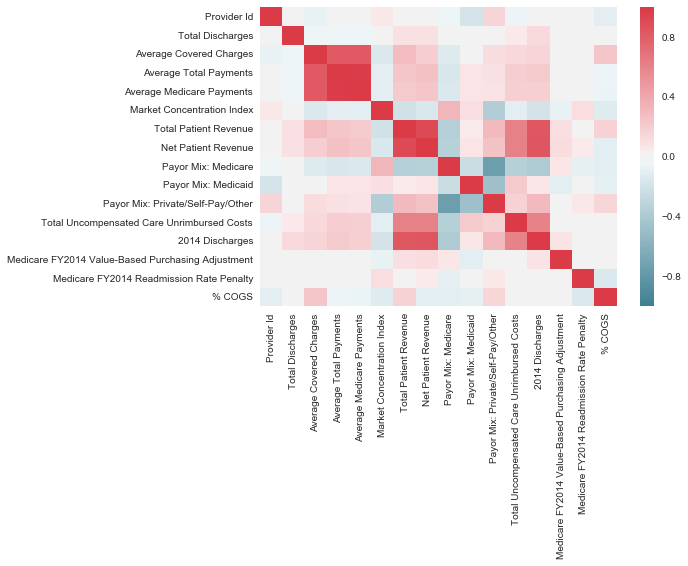

In [28]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [29]:
data[['Provider Id','DRG Definition']].groupby(['DRG Definition']).count().sort('Provider Id', ascending=False)

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Provider Id
DRG Definition,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,2757
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,2756
292 - HEART FAILURE & SHOCK W CC,2706
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",2675
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,2663
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2643
603 - CELLULITIS W/O MCC,2598
291 - HEART FAILURE & SHOCK W MCC,2586
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC,2529


In [30]:
data_vis = data.loc[data['DRG Definition'].isin(['292 - HEART FAILURE & SHOCK W CC', '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC', '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'])]

In [31]:
data_vis.shape

(7757, 25)

In [32]:
data_vis.head()

,DRG Definition,Provider Id,Provider Name,Provider State,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Ownership,...,Net Patient Revenue,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,Education Designation,% COGS
34748,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,103,22269.75728,5525.281553,4670.601942,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.0010,0.0,No,0.807248
132396,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,206,45652.65534,11839.597090,10499.402910,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.0010,0.0,No,0.807248
77107,292 - HEART FAILURE & SHOCK W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,163,23776.72393,5865.950920,5068.036810,Governmental - County,...,314934337.0,0.455,0.131,0.413,26210303.0,18489.0,0.0010,0.0,No,0.807248
132397,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10005,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,170,31178.92941,11490.970590,10043.088240,Governmental - County,...,152458646.0,0.462,0.179,0.359,9858366.0,8849.0,0.0021,0.0,No,0.692511
34749,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,10005,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,81,12789.22222,5298.345679,4276.271605,Governmental - County,...,152458646.0,0.462,0.179,0.359,9858366.0,8849.0,0.0021,0.0,No,0.692511


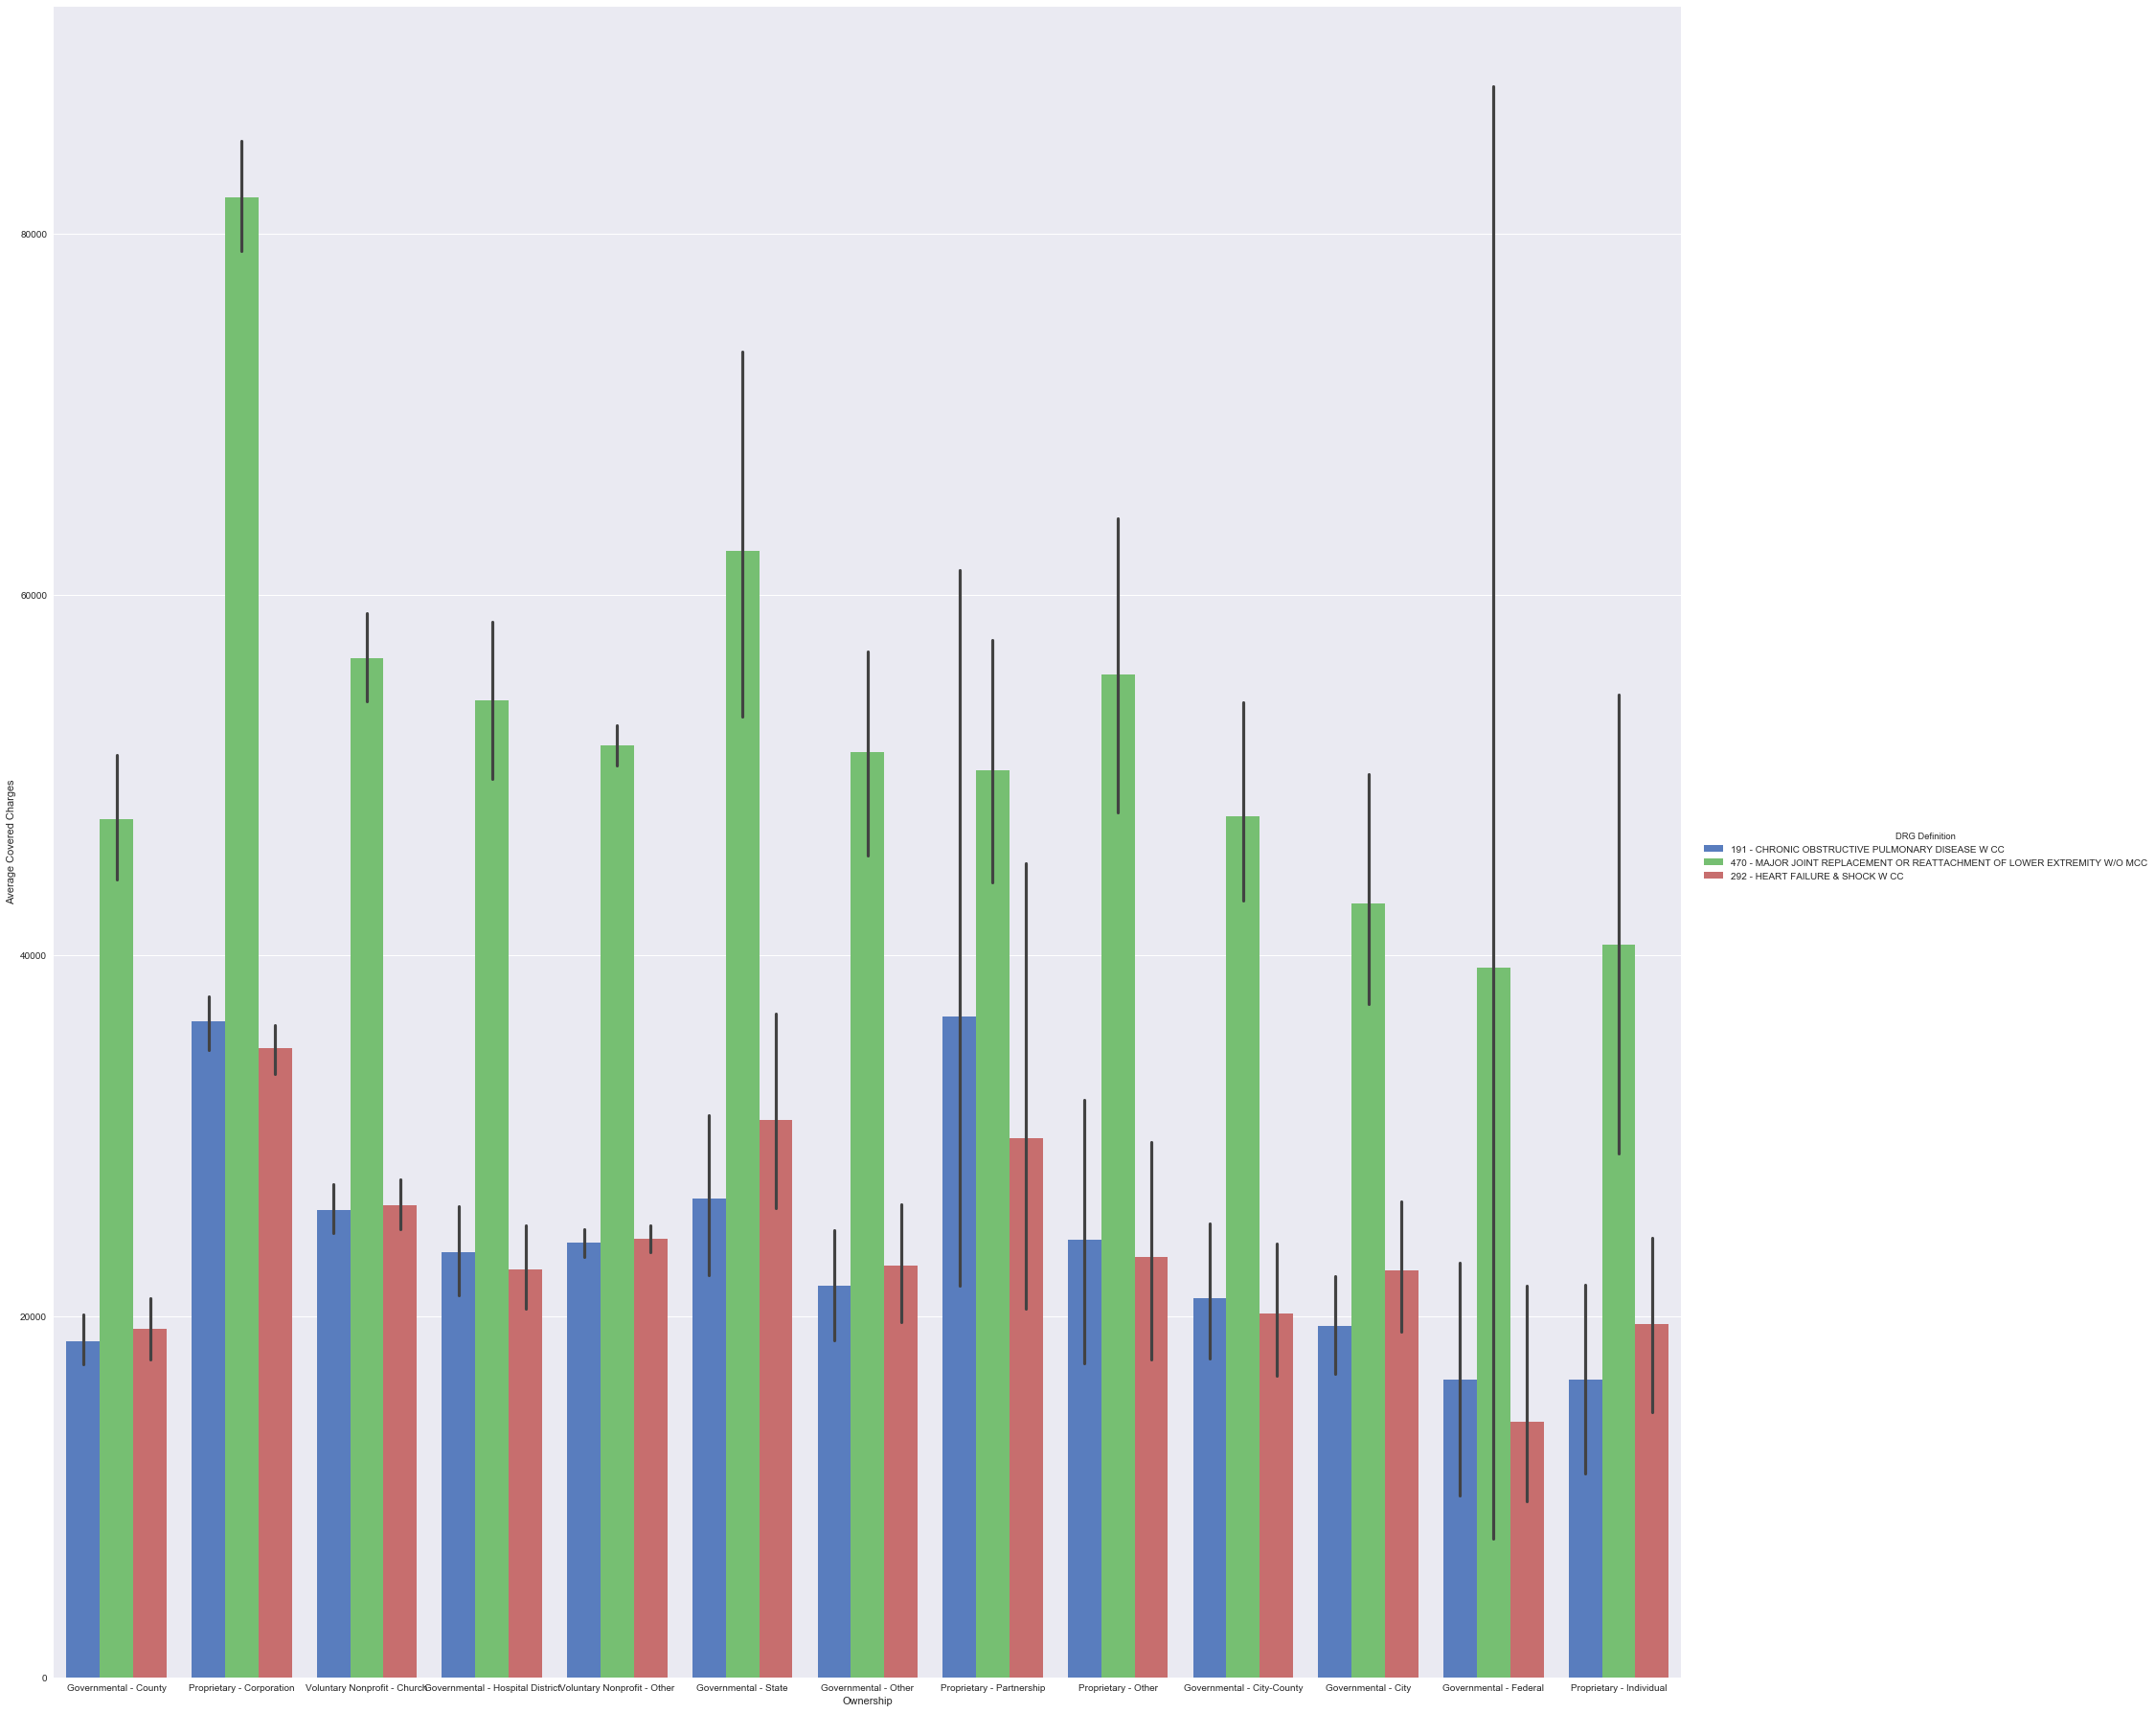

In [33]:
g = sns.factorplot(x="Ownership", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=25, kind="bar", palette="muted")
g.despine(left=True)

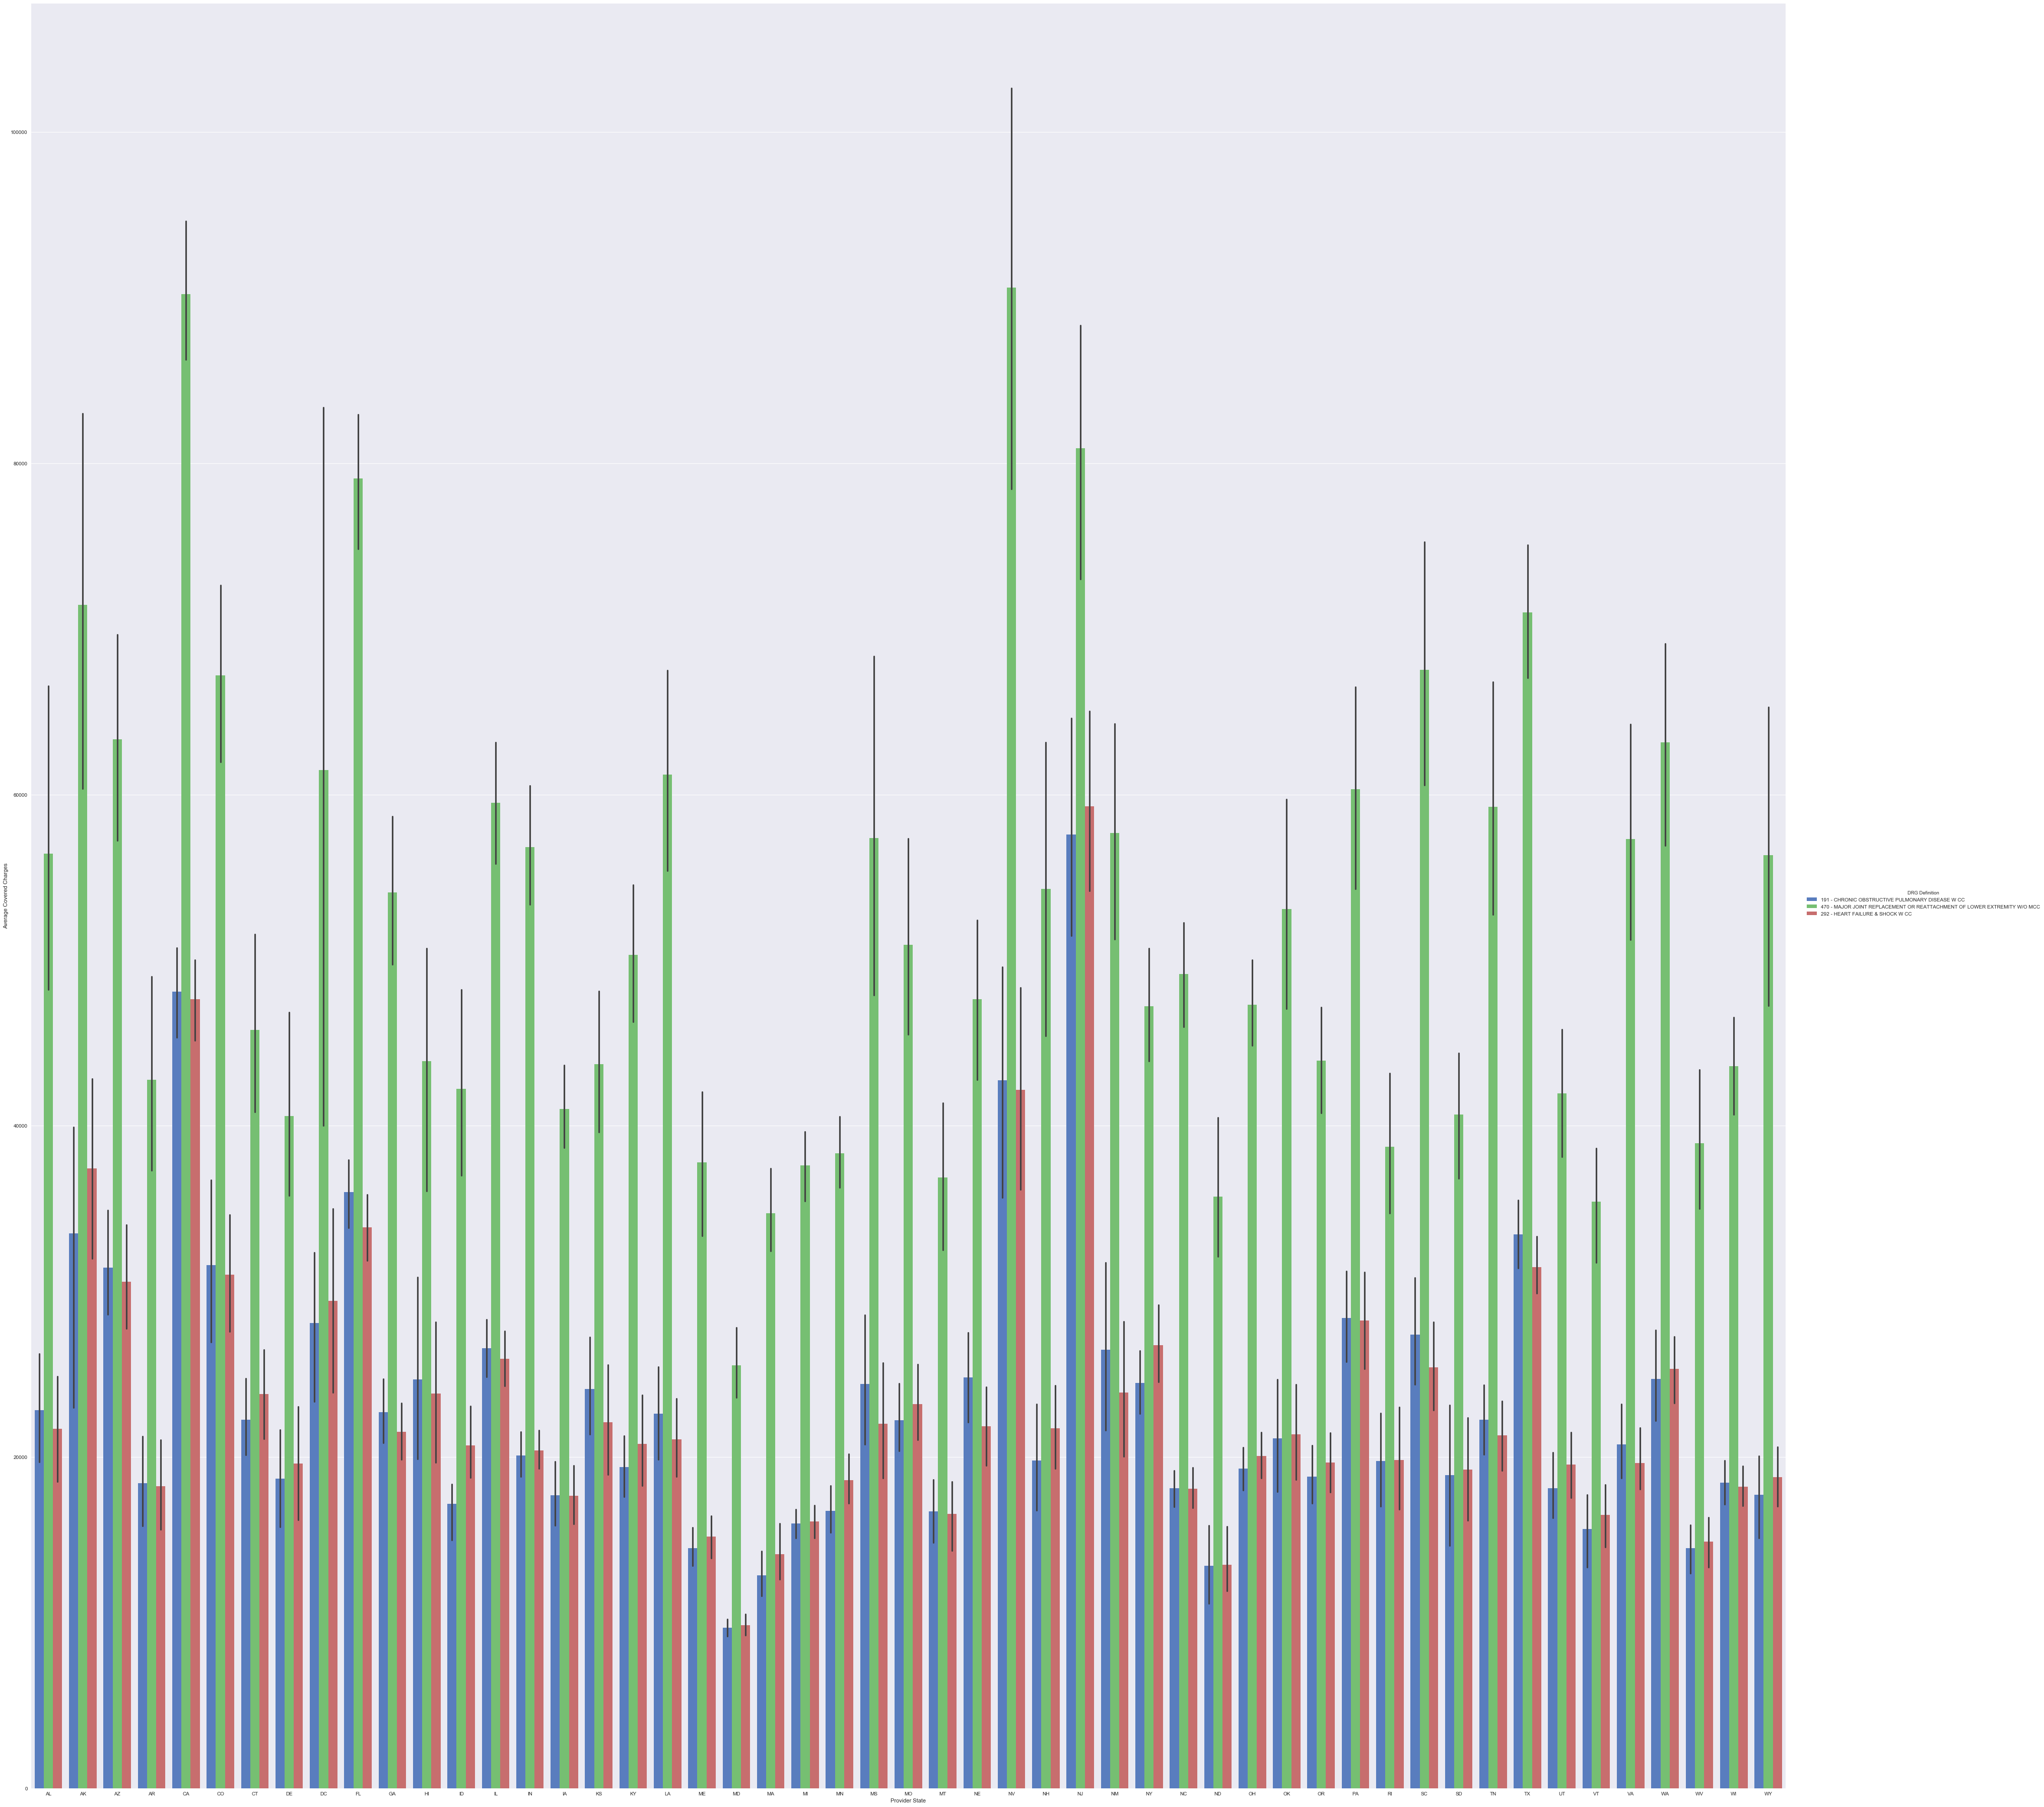

In [34]:
g1 = sns.factorplot(x="Provider State", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=50, kind="bar", palette="muted")
g1.despine(left=True)

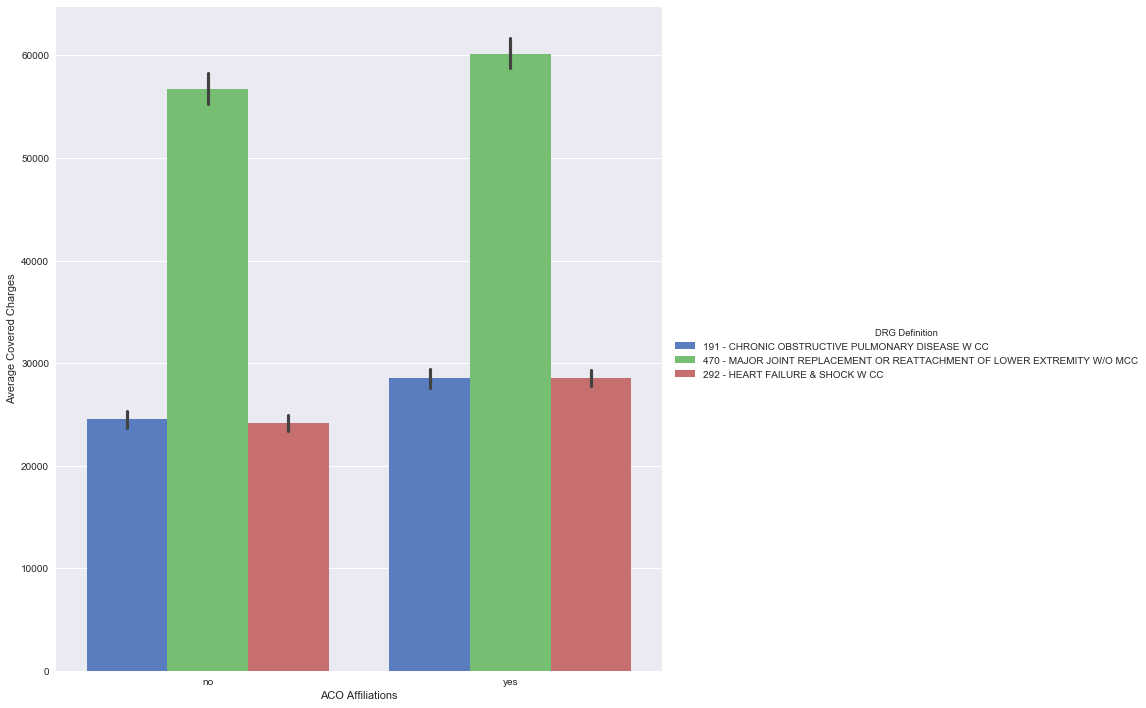

In [35]:
g2 = sns.factorplot(x="ACO Affiliations", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=10, kind="bar", palette="muted")
g2.despine(left=True)

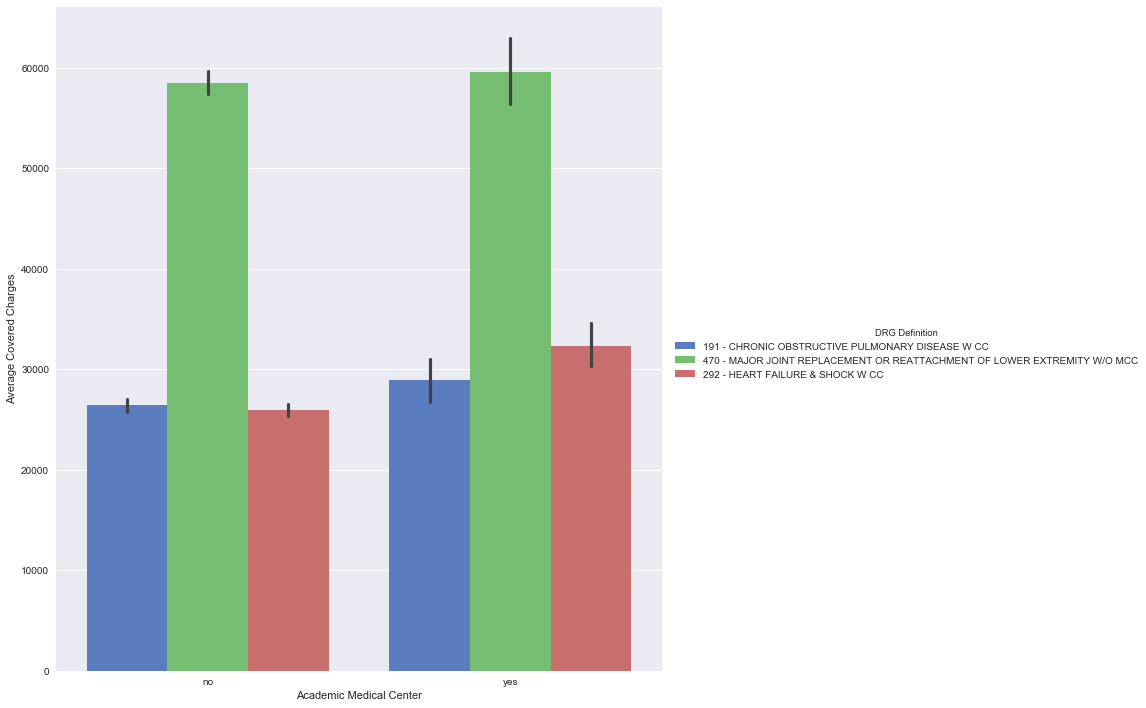

In [36]:
g3 = sns.factorplot(x="Academic Medical Center", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=10, kind="bar", palette="muted")
g3.despine(left=True)

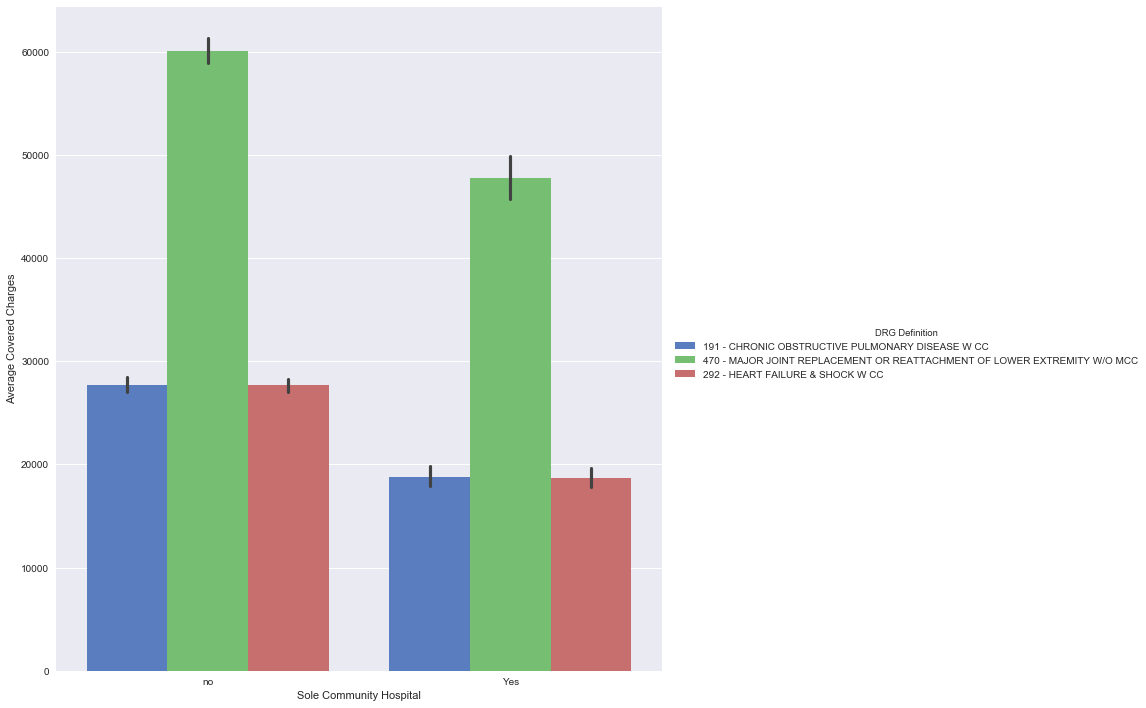

In [37]:
g4 = sns.factorplot(x="Sole Community Hospital", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=10, kind="bar", palette="muted")
g4.despine(left=True)

In [38]:
log_columns = ['Average Covered Charges']  # any others?
log_data_vis = data_vis.copy()
log_data_vis[log_columns] = log_data_vis[log_columns].apply(np.log10)

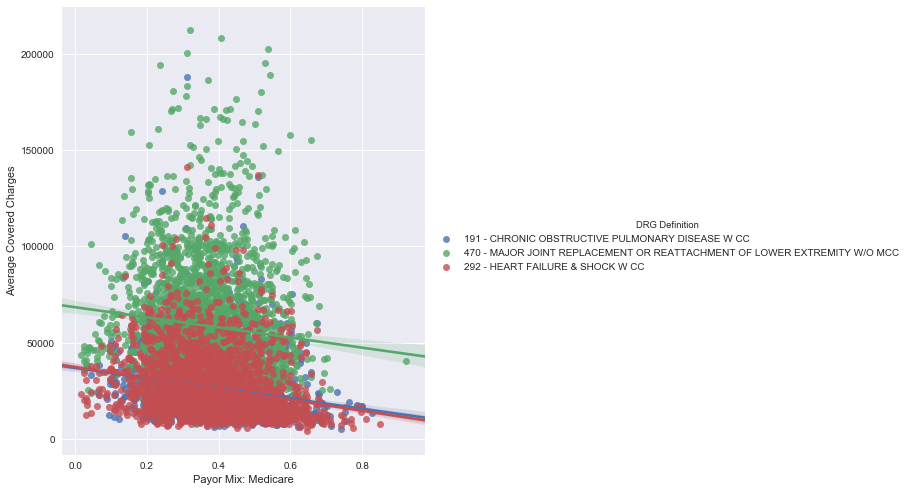

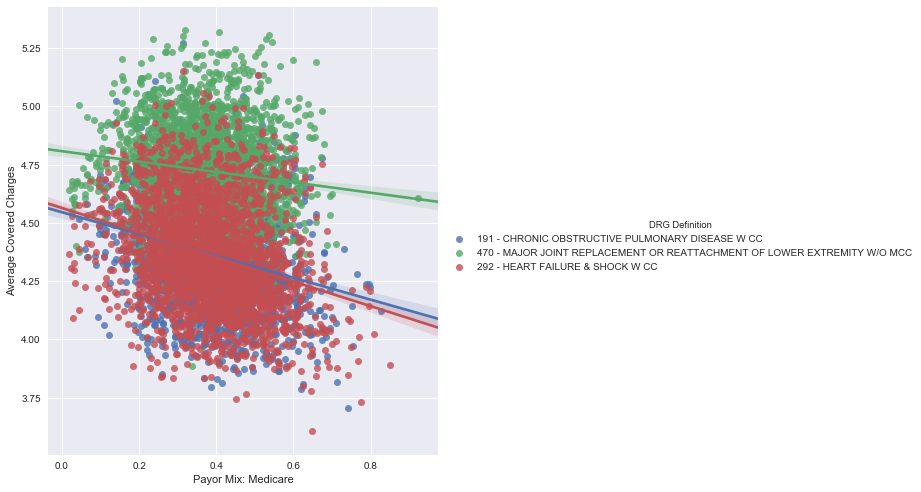

In [39]:
print sns.lmplot(x="Payor Mix: Medicare", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Payor Mix: Medicare", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

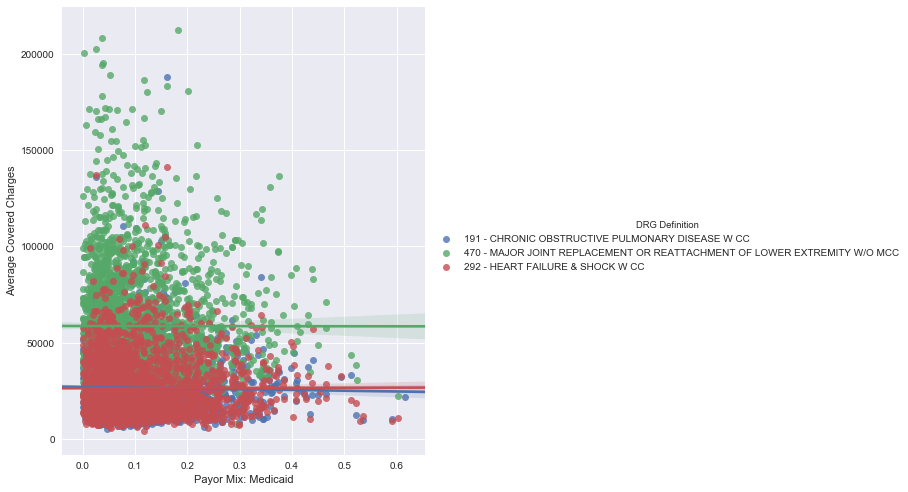

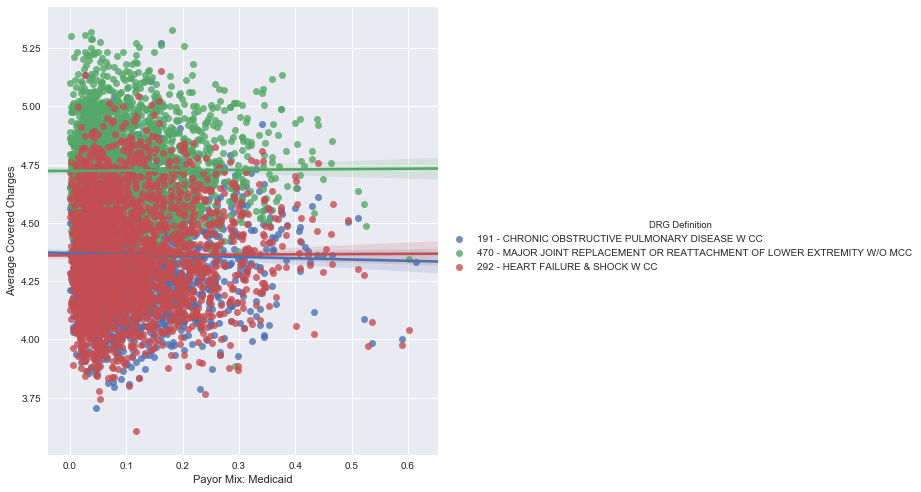

In [40]:
print sns.lmplot(x="Payor Mix: Medicaid", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Payor Mix: Medicaid", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

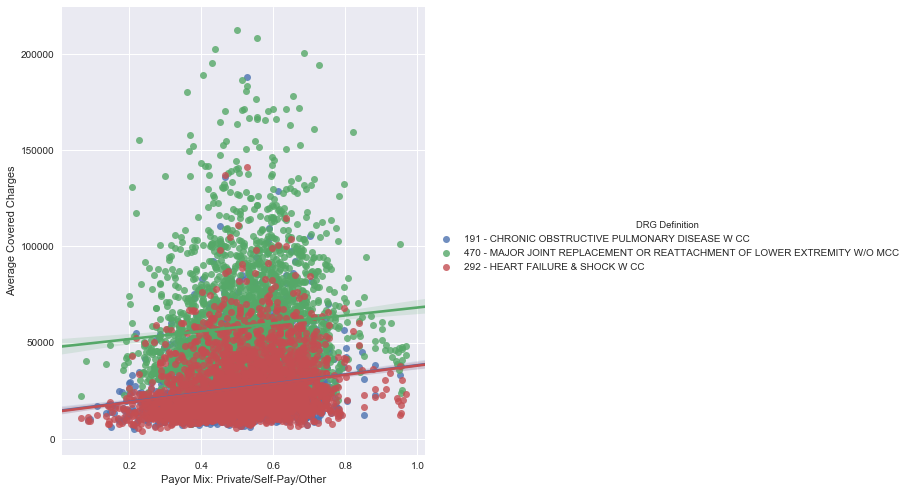

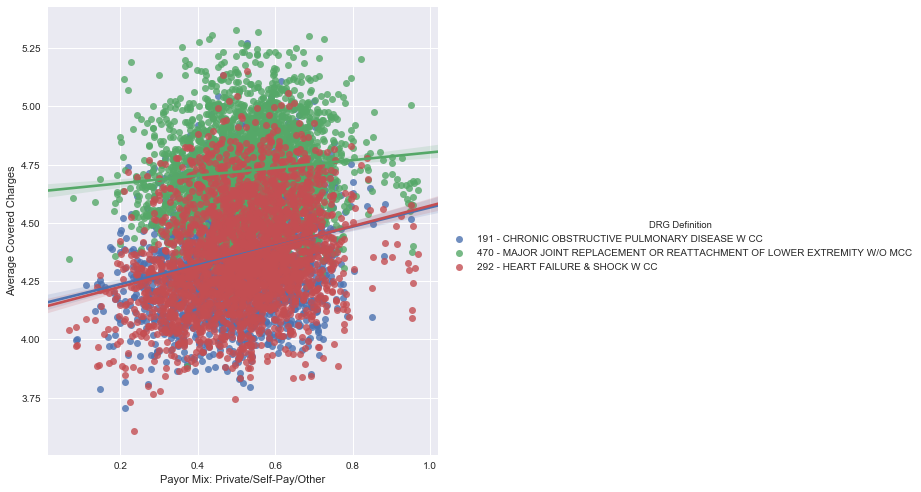

In [41]:
print sns.lmplot(x="Payor Mix: Private/Self-Pay/Other", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Payor Mix: Private/Self-Pay/Other", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

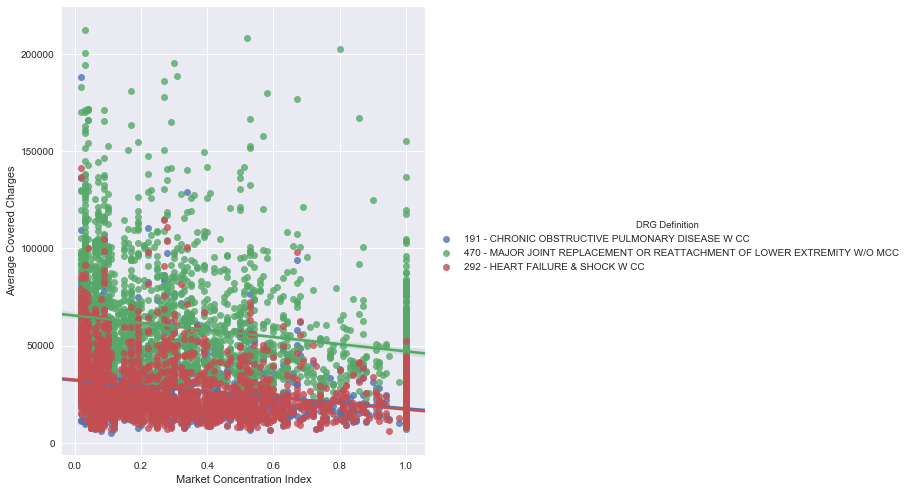

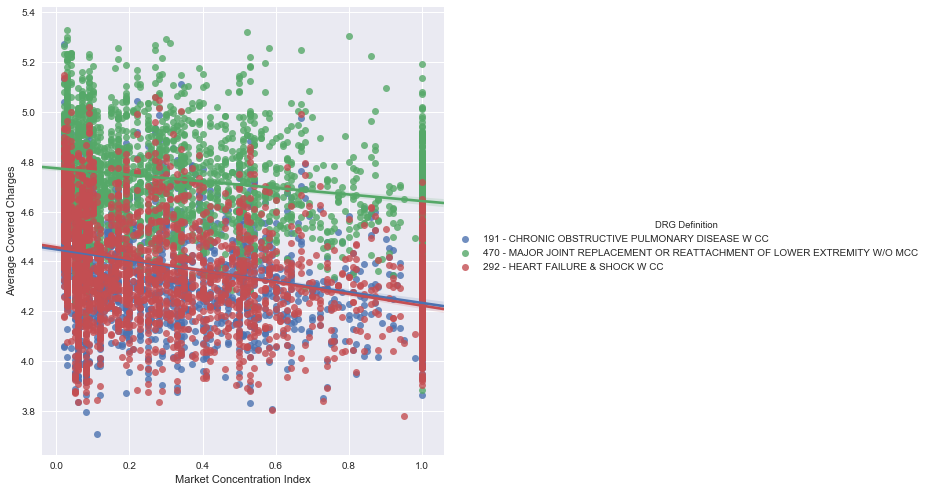

In [42]:
print sns.lmplot(x="Market Concentration Index", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Market Concentration Index", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

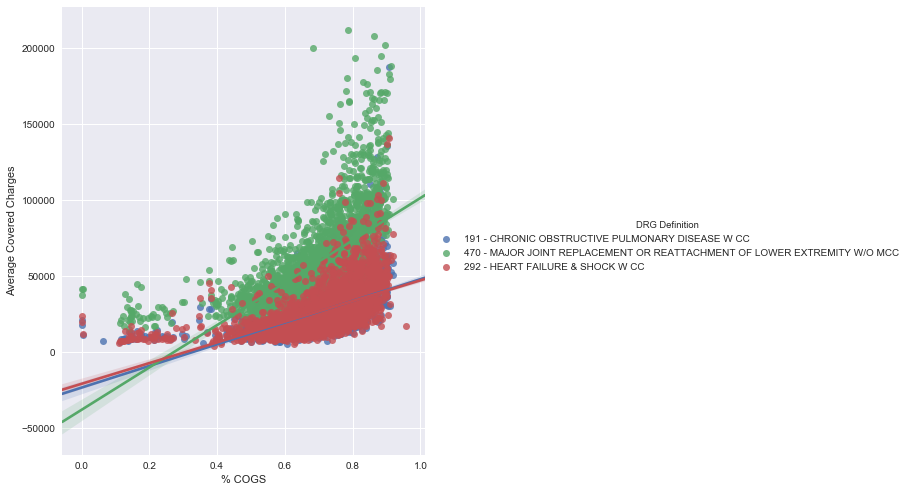

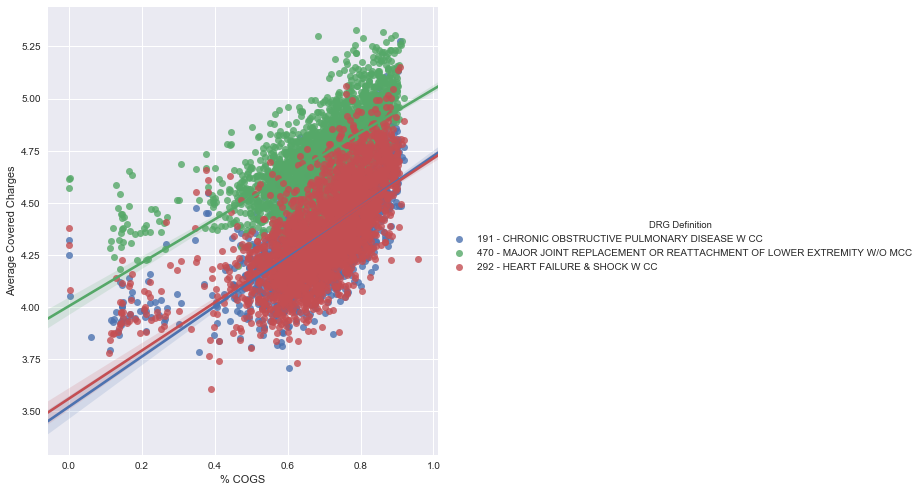

In [43]:
print sns.lmplot(x="% COGS", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="% COGS", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

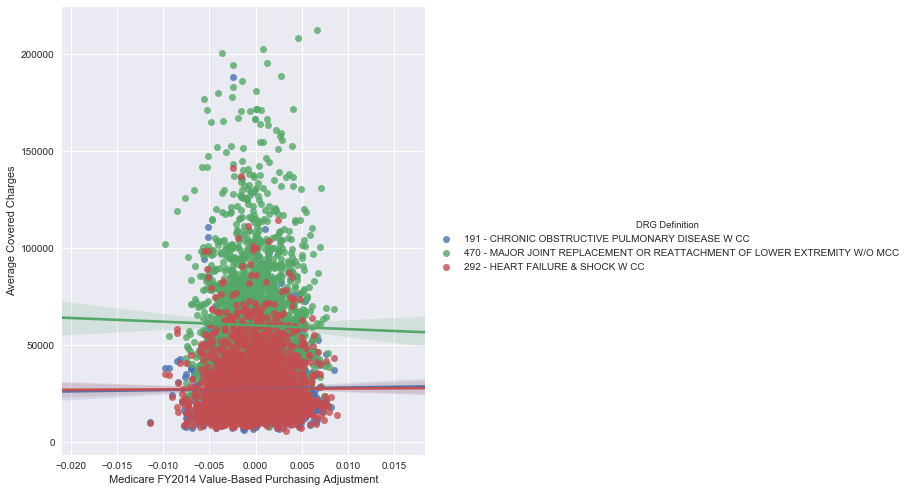

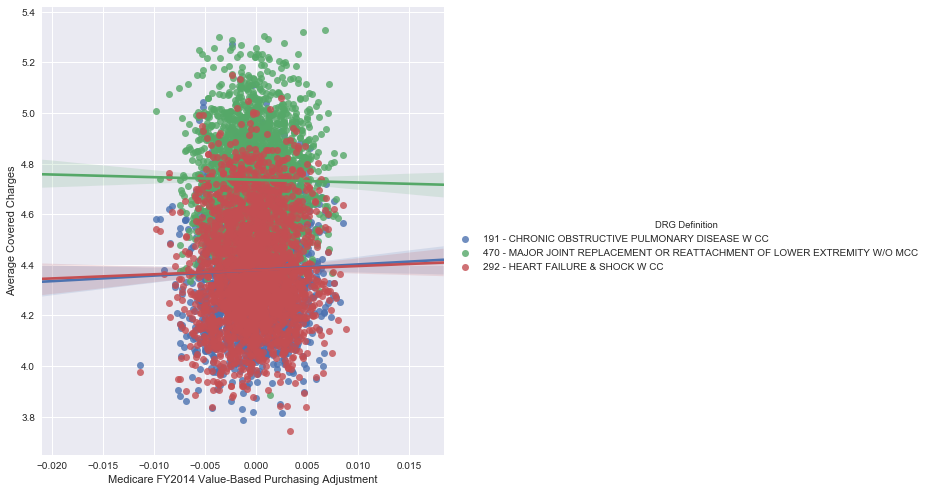

In [44]:
print sns.lmplot(x="Medicare FY2014 Value-Based Purchasing Adjustment", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Medicare FY2014 Value-Based Purchasing Adjustment", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

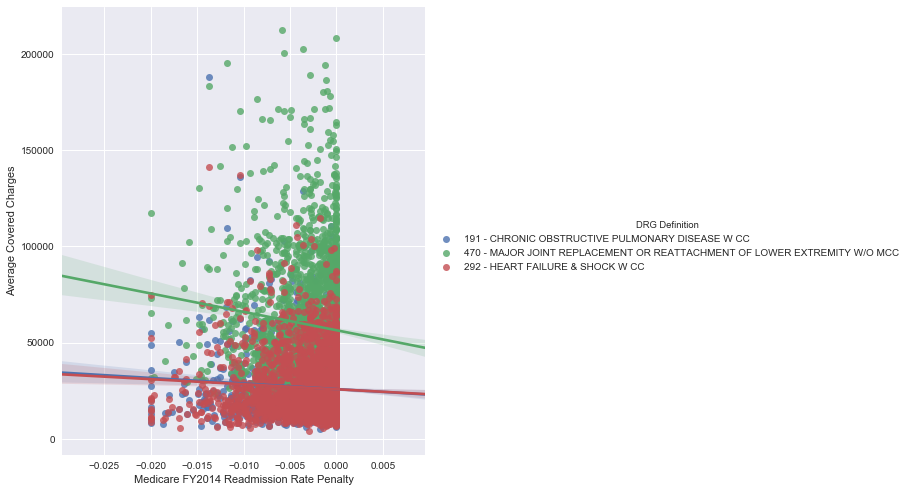

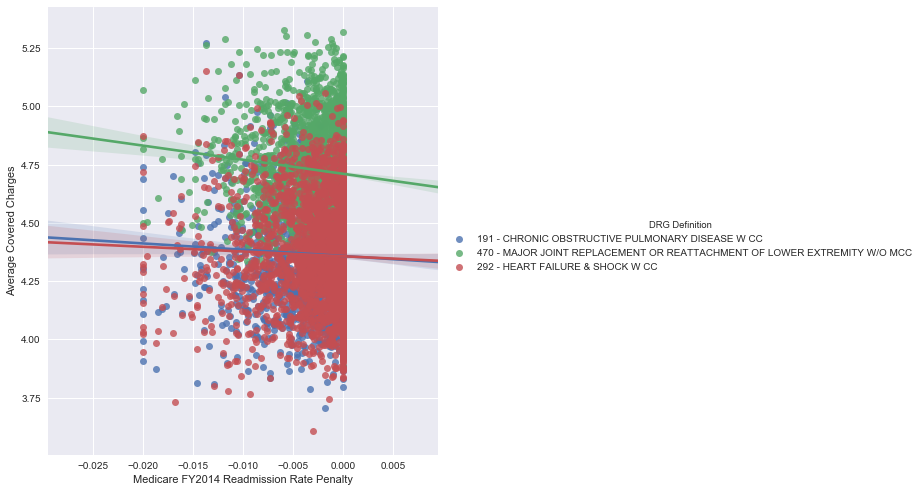

In [45]:
print sns.lmplot(x="Medicare FY2014 Readmission Rate Penalty", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Medicare FY2014 Readmission Rate Penalty", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

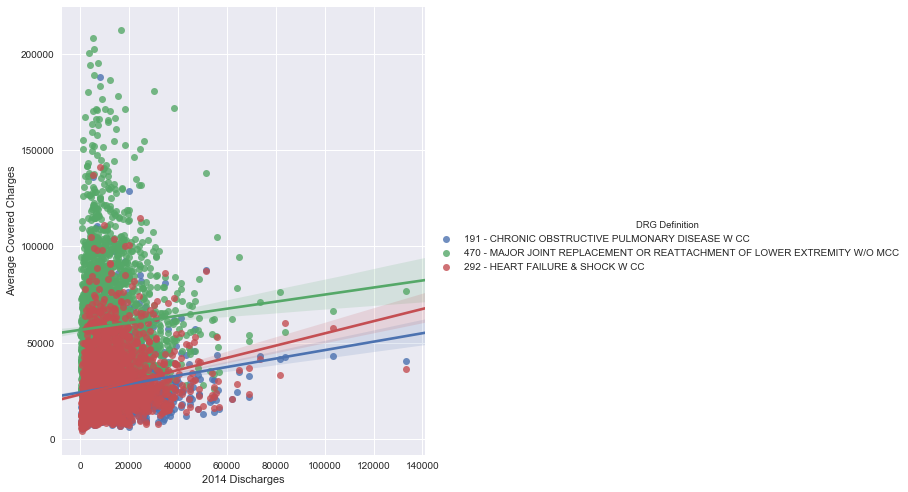

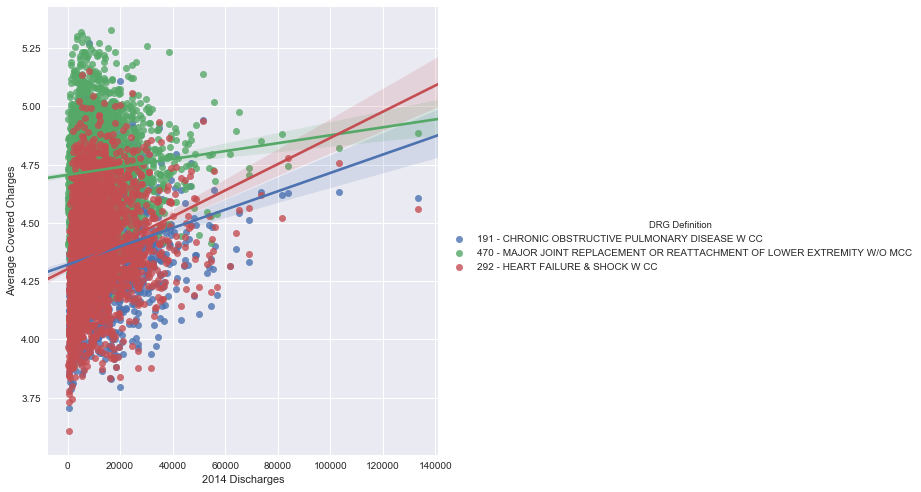

In [46]:
print sns.lmplot(x="2014 Discharges", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="2014 Discharges", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

Takeawys from exploratory analysis:

1) The Hospital Ownership, Provider State, and other descriptors of the Hospital Type (Academic Status, ACO) are important factors to consider.

2) Having more patients with private insurance may help explain higher prices.

3) COGS is directly correlated with prices.

4) Quality metrics appear to have no correlation with prices. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3866d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124bf9c50>]], dtype=object)

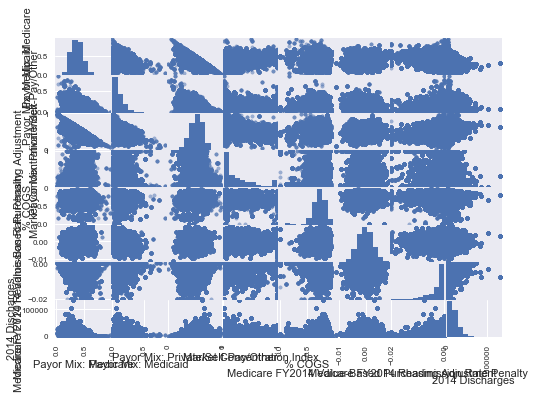

In [47]:
pd.scatter_matrix(data[['Payor Mix: Medicare', 'Payor Mix: Medicaid', 'Payor Mix: Private/Self-Pay/Other', 'Market Concentration Index', '% COGS', 'Medicare FY2014 Value-Based Purchasing Adjustment', 'Medicare FY2014 Readmission Rate Penalty', '2014 Discharges']])


Payor Mix: Medicare, Payor Mix: Private/Self-Pay/Other, % COGS, and Medicare FY2014 Value-Based Purchasing Adjustment are normally distributed

In [48]:
data.isnull().sum()

DRG Definition                                           0
Provider Id                                              0
Provider Name                                            0
Provider State                                           0
Hospital Referral Region (HRR) Description               0
Total Discharges                                         0
Average Covered Charges                                  0
Average Total Payments                                   0
Average Medicare Payments                                0
Ownership                                                0
Sole Community Hospital                                  0
Academic Medical Center                                  0
Market Concentration Index                            4133
ACO Affiliations                                         0
Total Patient Revenue                                  485
Net Patient Revenue                                    485
Payor Mix: Medicare                                     

In [50]:
data2 = data.dropna()

In [51]:
data2.shape

(164782, 25)

In [52]:
DRG_count = data2[['Provider Id','DRG Definition']].groupby(['DRG Definition']).count().sort('Provider Id', ascending=True)
            

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [53]:
DRG_count.head()

,Provider Id
DRG Definition,
383 - UNCOMPLICATED PEPTIC ULCER W MCC,1
376 - DIGESTIVE MALIGNANCY W/O CC/MCC,1
675 - OTHER KIDNEY & URINARY TRACT PROCEDURES W/O CC/MCC,1
"514 - HAND OR WRIST PROC, EXCEPT MAJOR THUMB OR JOINT PROC W/O CC/MCC",1
664 - MINOR BLADDER PROCEDURES W/O CC/MCC,1


In [54]:
DRG_count.dtypes

Provider Id    int64
dtype: object

In [55]:
DRG_count.reset_index(level=0, inplace=True)

In [56]:
DRG_count.head()

,DRG Definition,Provider Id
0,383 - UNCOMPLICATED PEPTIC ULCER W MCC,1
1,376 - DIGESTIVE MALIGNANCY W/O CC/MCC,1
2,675 - OTHER KIDNEY & URINARY TRACT PROCEDURES ...,1
3,"514 - HAND OR WRIST PROC, EXCEPT MAJOR THUMB O...",1
4,664 - MINOR BLADDER PROCEDURES W/O CC/MCC,1


In [57]:
DRG_count = DRG_count.rename(index=str, columns={"Provider Id": "Count of DRG"})

In [58]:
data2 = pd.merge(data2, DRG_count, how='left', on='DRG Definition')

In [59]:
data2.head()

,DRG Definition,Provider Id,Provider Name,Provider State,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Ownership,...,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,Education Designation,% COGS,Count of DRG
0,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,87,24335.63218,4863.747126,3675.517241,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248,1805
1,393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,23,42650.21739,9413.304348,8656.086957,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248,669
2,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,82,26723.29268,5818.768293,4753.621951,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248,1832
3,242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,11,84830.27273,19307.181820,16432.090910,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248,552
4,149 - DYSEQUILIBRIUM,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,20,22990.80000,4351.350000,2692.700000,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,0.001,0.0,No,0.807248,495


In [60]:
data2.shape

(164782, 26)

In [61]:
data3 = data2.drop(data2[data2['Count of DRG'] < 300].index)

In [62]:
data3.shape

(143575, 26)

In [63]:
data3.dtypes

DRG Definition                                        object
Provider Id                                            int64
Provider Name                                         object
Provider State                                        object
Hospital Referral Region (HRR) Description            object
Total Discharges                                       int64
Average Covered Charges                              float64
Average Total Payments                               float64
Average Medicare Payments                            float64
Ownership                                             object
Sole Community Hospital                               object
Academic Medical Center                               object
Market Concentration Index                           float64
ACO Affiliations                                      object
Total Patient Revenue                                float64
Net Patient Revenue                                  float64
Payor Mix: Medicare     

In [64]:
DRG_avg = data3[['Average Covered Charges','DRG Definition']].groupby(['DRG Definition']).mean().sort('Average Covered Charges', ascending=False)
DRG_avg.reset_index(level=0, inplace=True)
DRG_avg = DRG_avg.rename(index=str, columns={"Average Covered Charges": "Average Charge by DRG"})
print DRG_avg.head()            

                                      DRG Definition  Average Charge by DRG
0  003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FA...          516691.997086
1  004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...          316654.624613
2  219 - CARDIAC VALVE & OTH MAJ CARDIOTHORACIC P...          235940.387441
3         233 - CORONARY BYPASS W CARDIAC CATH W MCC          219153.457625
4   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS          180416.342564


/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [65]:
state = pd.get_dummies(data3['Provider State'])
state.columns = ['state_' + str(i) for i in state.columns]
data4 = data3.join(state)
data5 = data4.drop(['state_WY'], axis=1)
print data5.head()

                                    DRG Definition  Provider Id  \
0  690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC        10001   
1     393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC        10001   
2           194 - SIMPLE PNEUMONIA & PLEURISY W CC        10001   
3  242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC        10001   
4                             149 - DYSEQUILIBRIUM        10001   

                      Provider Name Provider State  \
0  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
2  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
3  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
4  SOUTHEAST ALABAMA MEDICAL CENTER             AL   

  Hospital Referral Region (HRR) Description  Total Discharges  \
0                                AL - Dothan                87   
1                                AL - Dothan                23   
2                                AL - Dothan                82   
3       

In [66]:
ownership = pd.get_dummies(data5['Ownership'])
ownership.columns = ['own_' + str(i) for i in ownership.columns]
data6 = data5.join(ownership)
data7 = data6.drop(['own_Proprietary - Individual'], axis=1)
print data7.head()

                                    DRG Definition  Provider Id  \
0  690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC        10001   
1     393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC        10001   
2           194 - SIMPLE PNEUMONIA & PLEURISY W CC        10001   
3  242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC        10001   
4                             149 - DYSEQUILIBRIUM        10001   

                      Provider Name Provider State  \
0  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
2  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
3  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
4  SOUTHEAST ALABAMA MEDICAL CENTER             AL   

  Hospital Referral Region (HRR) Description  Total Discharges  \
0                                AL - Dothan                87   
1                                AL - Dothan                23   
2                                AL - Dothan                82   
3       

In [67]:
sch = pd.get_dummies(data7['Sole Community Hospital'])
sch.columns = ['sch_' + str(i) for i in sch.columns]
data8 = data7.join(sch)
data9 = data8.drop(['sch_no'], axis=1)
print data9.head()

                                    DRG Definition  Provider Id  \
0  690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC        10001   
1     393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC        10001   
2           194 - SIMPLE PNEUMONIA & PLEURISY W CC        10001   
3  242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC        10001   
4                             149 - DYSEQUILIBRIUM        10001   

                      Provider Name Provider State  \
0  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
2  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
3  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
4  SOUTHEAST ALABAMA MEDICAL CENTER             AL   

  Hospital Referral Region (HRR) Description  Total Discharges  \
0                                AL - Dothan                87   
1                                AL - Dothan                23   
2                                AL - Dothan                82   
3       

In [68]:
amc = pd.get_dummies(data9['Academic Medical Center'])
amc.columns = ['amc_' + str(i) for i in amc.columns]
data10 = data9.join(amc)
data11 = data10.drop(['amc_no'], axis=1)
print data11.head()

                                    DRG Definition  Provider Id  \
0  690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC        10001   
1     393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC        10001   
2           194 - SIMPLE PNEUMONIA & PLEURISY W CC        10001   
3  242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC        10001   
4                             149 - DYSEQUILIBRIUM        10001   

                      Provider Name Provider State  \
0  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
2  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
3  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
4  SOUTHEAST ALABAMA MEDICAL CENTER             AL   

  Hospital Referral Region (HRR) Description  Total Discharges  \
0                                AL - Dothan                87   
1                                AL - Dothan                23   
2                                AL - Dothan                82   
3       

In [69]:
aco = pd.get_dummies(data11['ACO Affiliations'])
aco.columns = ['aco_' + str(i) for i in aco.columns]
data12 = data11.join(aco)
data13 = data12.drop(['aco_no'], axis=1)
print data13.head()

                                    DRG Definition  Provider Id  \
0  690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC        10001   
1     393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC        10001   
2           194 - SIMPLE PNEUMONIA & PLEURISY W CC        10001   
3  242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC        10001   
4                             149 - DYSEQUILIBRIUM        10001   

                      Provider Name Provider State  \
0  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
2  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
3  SOUTHEAST ALABAMA MEDICAL CENTER             AL   
4  SOUTHEAST ALABAMA MEDICAL CENTER             AL   

  Hospital Referral Region (HRR) Description  Total Discharges  \
0                                AL - Dothan                87   
1                                AL - Dothan                23   
2                                AL - Dothan                82   
3       

In [70]:
data13.dtypes

DRG Definition                                        object
Provider Id                                            int64
Provider Name                                         object
Provider State                                        object
Hospital Referral Region (HRR) Description            object
Total Discharges                                       int64
Average Covered Charges                              float64
Average Total Payments                               float64
Average Medicare Payments                            float64
Ownership                                             object
Sole Community Hospital                               object
Academic Medical Center                               object
Market Concentration Index                           float64
ACO Affiliations                                      object
Total Patient Revenue                                float64
Net Patient Revenue                                  float64
Payor Mix: Medicare     

In [71]:
data14 = data13.drop(['Payor Mix: Medicaid', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description', 'Average Total Payments', 'Average Medicare Payments','Ownership', 'Sole Community Hospital', 'Academic Medical Center','ACO Affiliations','Total Patient Revenue', 'Net Patient Revenue', 'Total Uncompensated Care Unrimbursed Costs','Count of DRG'], axis=1)

In [72]:
data14.dtypes

DRG Definition                                        object
Provider Id                                            int64
Total Discharges                                       int64
Average Covered Charges                              float64
Market Concentration Index                           float64
Payor Mix: Medicare                                  float64
Payor Mix: Private/Self-Pay/Other                    float64
2014 Discharges                                      float64
Medicare FY2014 Value-Based Purchasing Adjustment    float64
Medicare FY2014 Readmission Rate Penalty             float64
Education Designation                                 object
% COGS                                               float64
state_AK                                               uint8
state_AL                                               uint8
state_AR                                               uint8
state_AZ                                               uint8
state_CA                

In [73]:
data15 = pd.merge(data14, DRG_avg, how='left', on='DRG Definition')
print data15.head()

                                    DRG Definition  Provider Id  \
0  690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC        10001   
1     393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC        10001   
2           194 - SIMPLE PNEUMONIA & PLEURISY W CC        10001   
3  242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC        10001   
4                             149 - DYSEQUILIBRIUM        10001   

   Total Discharges  Average Covered Charges  Market Concentration Index  \
0                87              24335.63218                         0.5   
1                23              42650.21739                         0.5   
2                82              26723.29268                         0.5   
3                11              84830.27273                         0.5   
4                20              22990.80000                         0.5   

   Payor Mix: Medicare  Payor Mix: Private/Self-Pay/Other  2014 Discharges  \
0                0.455                              0.413     

In [89]:
data15['% Charge Difference'] = (data15['Average Covered Charges'] - data15['Average Charge by DRG']) / data15['Average Charge by DRG']
print data15[['DRG Definition', 'Provider Id','Average Covered Charges','% COGS','Average Charge by DRG','% Charge Difference']].head()

                                    DRG Definition  Provider Id  \
0  690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC        10001   
1     393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC        10001   
2           194 - SIMPLE PNEUMONIA & PLEURISY W CC        10001   
3  242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC        10001   
4                             149 - DYSEQUILIBRIUM        10001   

   Average Covered Charges    % COGS  Average Charge by DRG  \
0              24335.63218  0.807248           22577.576937   
1              42650.21739  0.807248           50685.380072   
2              26723.29268  0.807248           28544.922513   
3              84830.27273  0.807248          107286.662557   
4              22990.80000  0.807248           25149.911951   

   % Charge Difference  
0             0.077867  
1            -0.158530  
2            -0.063816  
3            -0.209312  
4            -0.085850  


In [75]:
data16 = data15[['Provider Id','% Charge Difference']].groupby(['Provider Id']).mean()
print data16.head()

             % Charge Difference
Provider Id                     
10001                  -0.189709
10005                  -0.553506
10006                  -0.159106
10011                  -0.140868
10016                  -0.027757


In [77]:
data16.reset_index(level=0, inplace=True)
data17 = pd.merge(data16, data14, how='left', on='Provider Id')
print data17.dtypes

Provider Id                                            int64
% Charge Difference                                  float64
DRG Definition                                        object
Total Discharges                                       int64
Average Covered Charges                              float64
Market Concentration Index                           float64
Payor Mix: Medicare                                  float64
Payor Mix: Private/Self-Pay/Other                    float64
2014 Discharges                                      float64
Medicare FY2014 Value-Based Purchasing Adjustment    float64
Medicare FY2014 Readmission Rate Penalty             float64
Education Designation                                 object
% COGS                                               float64
state_AK                                               uint8
state_AL                                               uint8
state_AR                                               uint8
state_AZ                

In [78]:
data_final = data17.drop(['Provider Id', 'DRG Definition', 'Total Discharges', 'Average Covered Charges', 'Education Designation'], axis=1)

In [84]:
data_final.dtypes

% Charge Difference                                  float64
Market Concentration Index                           float64
Payor Mix: Medicare                                  float64
Payor Mix: Private/Self-Pay/Other                    float64
2014 Discharges                                      float64
Medicare FY2014 Value-Based Purchasing Adjustment    float64
Medicare FY2014 Readmission Rate Penalty             float64
% COGS                                               float64
state_AK                                               uint8
state_AL                                               uint8
state_AR                                               uint8
state_AZ                                               uint8
state_CA                                               uint8
state_CO                                               uint8
state_CT                                               uint8
state_DC                                               uint8
state_DE                

In [92]:
from sklearn import grid_search, feature_selection, linear_model

x = data_final.drop(['% Charge Difference'], axis=1)
y = data_final['% Charge Difference']

alphas = np.logspace(-5, 5, 11)
gs_Ridge = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas,'fit_intercept':[True,False],'normalize':[True,False]},
    scoring='r2',cv=5)

gs_Ridge.fit(x, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [90]:
print gs_Ridge.best_score_
print 
print gs_Ridge.best_estimator_
print 
print x.columns
print 
print gs_Ridge.best_estimator_.coef_

0.420048144887

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Index([u'Market Concentration Index', u'Payor Mix: Medicare',
       u'Payor Mix: Private/Self-Pay/Other', u'2014 Discharges',
       u'Medicare FY2014 Value-Based Purchasing Adjustment',
       u'Medicare FY2014 Readmission Rate Penalty', u'% COGS', u'state_AK',
       u'state_AL', u'state_AR', u'state_AZ', u'state_CA', u'state_CO',
       u'state_CT', u'state_DC', u'state_DE', u'state_FL', u'state_GA',
       u'state_HI', u'state_IA', u'state_ID', u'state_IL', u'state_IN',
       u'state_KS', u'state_KY', u'state_LA', u'state_MA', u'state_ME',
       u'state_MI', u'state_MN', u'state_MO', u'state_MS', u'state_MT',
       u'state_NC', u'state_ND', u'state_NE', u'state_NH', u'state_NJ',
       u'state_NM', u'state_NV', u'state_NY', u'state_OH', u'state_OK',
       u'state_OR', u'state_PA', u'state_RI', u'state_SC', u'state_SD',
       u'st

In [96]:
data_jr = data14.loc[data14['DRG Definition'] == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC']
print data_jr.shape
print data_jr.dtypes

(1811, 75)
DRG Definition                                        object
Provider Id                                            int64
Total Discharges                                       int64
Average Covered Charges                              float64
Market Concentration Index                           float64
Payor Mix: Medicare                                  float64
Payor Mix: Private/Self-Pay/Other                    float64
2014 Discharges                                      float64
Medicare FY2014 Value-Based Purchasing Adjustment    float64
Medicare FY2014 Readmission Rate Penalty             float64
Education Designation                                 object
% COGS                                               float64
state_AK                                               uint8
state_AL                                               uint8
state_AR                                               uint8
state_AZ                                               uint8
state_CA     

In [98]:
data_jr = data_jr.drop(['DRG Definition', 'Provider Id', '2014 Discharges', 'Education Designation'], axis=1)

In [102]:
from sklearn import grid_search, feature_selection, linear_model

x2 = data_jr.drop(['Average Covered Charges'], axis=1)
y2 = data_jr['Average Covered Charges']

alphas = np.logspace(-5, 5, 11)
gs_Lasso = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas,'fit_intercept':[True,False],'normalize':[True,False]},
    scoring='r2',cv=5)

gs_Lasso.fit(x2, y2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [103]:
print gs_Lasso.best_score_
print 
print gs_Lasso.best_estimator_
print 
print x2.columns
print 
print gs_Lasso.best_estimator_.coef_

0.405031170384

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Index([u'Total Discharges', u'Market Concentration Index',
       u'Payor Mix: Medicare', u'Payor Mix: Private/Self-Pay/Other',
       u'Medicare FY2014 Value-Based Purchasing Adjustment',
       u'Medicare FY2014 Readmission Rate Penalty', u'% COGS', u'state_AK',
       u'state_AL', u'state_AR', u'state_AZ', u'state_CA', u'state_CO',
       u'state_CT', u'state_DC', u'state_DE', u'state_FL', u'state_GA',
       u'state_HI', u'state_IA', u'state_ID', u'state_IL', u'state_IN',
       u'state_KS', u'state_KY', u'state_LA', u'state_MA', u'state_ME',
       u'state_MI', u'state_MN', u'state_MO', u'state_MS', u'state_MT',
       u'state_NC', u'state_ND', u'state_NE', u'state_NH', u'state_NJ',
       u'state_NM', u'state_NV', u'state_NY', u'state_OH', u'state_OK',
       u'state_OR', u's

In [119]:
output2 = zip(x2.columns,gs_Lasso.best_estimator_.coef_)
labels2 = ['Feature','Coefficient']
Feature_Summary = pd.DataFrame.from_records(output2, columns=labels2)
print Feature_Summary

                                              Feature    Coefficient
0                                    Total Discharges      -2.871504
1                          Market Concentration Index      -0.000000
2                                 Payor Mix: Medicare      -0.000000
3                   Payor Mix: Private/Self-Pay/Other      -0.000000
4   Medicare FY2014 Value-Based Purchasing Adjustment   22325.266131
5            Medicare FY2014 Readmission Rate Penalty       0.000000
6                                              % COGS  135738.546483
7                                            state_AK   19312.513815
8                                            state_AL  -10649.747174
9                                            state_AR  -13504.824317
10                                           state_AZ      -0.000000
11                                           state_CA   28219.845772
12                                           state_CO    8123.967489
13                                

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_feature = sc.fit_transform(x2)

alphas = np.logspace(-5, 5, 11)
gs_Lasso2 = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas,'fit_intercept':[True,False],'normalize':[True,False]},
    scoring='r2',cv=5)

gs_Lasso2.fit(scaled_feature, y2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [122]:
output = zip(x2.columns,gs_Lasso2.best_estimator_.coef_)
labels = ['Feature','Scaled Coefficient']
Feature_Importance = pd.DataFrame.from_records(output, columns=labels)

Feature_Importance = Feature_Importance.loc[Feature_Importance['Scaled Coefficient'] != 0].sort('Scaled Coefficient', ascending=False)


/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [123]:
Features = pd.merge(Feature_Importance, Feature_Summary, how='left', on='Feature')
print Features

                                              Feature  Scaled Coefficient  \
0                                              % COGS        14103.804283   
1                                            state_CA         7610.307892   
2                       own_Proprietary - Corporation         5690.679644   
3                                            state_WA         1500.358361   
4                                            state_NJ         1498.797816   
5                                             amc_yes         1291.704755   
6                                            state_CO         1036.912986   
7                             own_Governmental - City          836.721285   
8                                            state_AK          785.380651   
9                                            state_TX          752.682381   
10                                            sch_Yes          536.047112   
11                           own_Governmental - State          512.928463   

In [124]:
Features['abs Scaled Coefficient'] = Features['Scaled Coefficient'].abs()

In [127]:
Features2 = Features.drop(['Scaled Coefficient'], axis=1)
Features2.sort('abs Scaled Coefficient', ascending=False)

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Feature,Coefficient,abs Scaled Coefficient
0,% COGS,135738.546483,14103.804283
1,state_CA,28219.845772,7610.307892
2,own_Proprietary - Corporation,15786.618455,5690.679644
39,state_TN,-13619.257568,1650.495293
3,state_WA,10605.613188,1500.358361
4,state_NJ,8974.844037,1498.797816
38,state_MI,-7359.568634,1327.754712
37,state_AR,-13504.824317,1302.285391
5,amc_yes,4121.154918,1291.704755
36,state_AL,-10649.747174,1290.625241
